# Computational Physics 2 - Project 4

## Metropolis algorithm for the Ising model

Both the Metropolis algorithm and the Ising model have a large number of applications ranging from condensed matter physics to computational social science. The Ising model is one of the simplest models that experiences a continuous phase transition. Here, we consider a 2D spin-1/2 Ising model on a square lattice, consisting of $N ≡ L × L$ sites. We also assume that $J > 0$, that is, the energy of a state is lowered when spins aligns. The symbol $<i,j>$ denotes any of the $2N$ nearest neighbor bonds. Further, we also assume periodic boundary conditions, mimicking complete translational
symmetry. All of this is summarized as follows:

\begin{equation*}
    \cal{H} = -J \sum_{<i,j>} s_i s_j
\end{equation*}

The excercies on this model were conduced as follows:

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import random
import math

#### 1. (20 pts) Without running any simulations, can you ”guess” and describe the ground state, i.e, the state for $T = 0$? What is the g.s. energy $<\cal H>$ and its magnetization per site $|<m>| = \frac{1}{N} |<\sum_{i=1}^N s_i>|$? What is the energy difference between g.s. and the first excited state? For the opposite limit, $T \rightarrow \infty$, what do you expect for the correlations $<s_i s_j>$ between neighbouring spins (Hint: consider the limiting value of the probability weights $lim_{T \rightarrow \infty} e^{- \cal H /k_B T}$)? What are $<\cal H>$ and $<m>$ in the $T' \rightarrow \infty$ limit?

When T=0, the states at all the sites would align, i.e. the ground state would be when all the spins at all sites would be in one direction. At ground state, the energy would be minimal and its magnetization per site would be maximal. The difference in energy would be 1 unit between the ground state and its first excited state. At infinite temperature, the energy would be 0 (maximum) and the magnetization per site would be zero as well.

#### 2. Write a computer program where you define the sites $i$ $\in$ $\{1,...,N\}$ ad their spins $s_i$ $\in$ $\{-1,+1\}$. Start with a small number of sites $L*L$, say $L=20$. For convenience, work in dimensionless units where $\cal H' = \cal{H}/J$ and $T' = Tk_B /J$.

In [272]:
L = 20 # grid size
N = L * L # total elements
Mat = np.array([[2*random.randint(0, 1)-1 for i in range(L)] for j in range(L)])
print(Mat)

[[ 1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1]
 [ 1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1]
 [ 1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1]
 [ 1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1]
 [ 1 -1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1]
 [-1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1]
 [ 1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1]
 [-1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1  1 -1  1]
 [ 1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1]
 [ 1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1]
 [-1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1  1]
 [ 1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [-1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1 -1  1]
 [ 1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1 -1

#### 3. Parameter and Initial Condition. $\textbf{(10 pts)}$ Define $T'$ as a parameter and initially set $T' = .1$. As an initial condition, set each spin to one of the two options at random. Define a function that computes the total system energy of a given (single) N-particle spin configuration, i.e.,

\begin{equation*}
    E' = - \sum_{\langle ij \rangle} s_i s_j
\end{equation*}

#### here, $s_i$ and $s_j$ are the configurations of the spins at site $i$ and $j$ for this given configuration.

In [273]:
# setting T as a parameter 
T = 0.1

# function to compute the total system energy
def energy_calc(M, L) -> float:
    sum = 0
    for i in range(L):
        for j in range(L):            
            # finding the up neighbour
            if(i == 0):
                up = M[L-1][j]
            else:
                up = M[i-1][j]
            
            # finding the down neighbour
            if( i == L-1):
                down = M[0][j]
            else:
                down = M[i+1][j]
            
            # finding the left neighbour
            if( j == 0 ):
                left = M[i][L-1]
            else:
                left = M[i][j-1]
            
            # finding the right neighbour
            if( j == L-1):
                right = M[i][0]
            else:
                right = M[i][j+1]
            
            # computing the value of the formula for the current element
            p = -(up + down + left + right) * M[i][j]

            # adding it to the overall sum
            sum += p         

    # dividing by two to get rid of the overlaps
    sum = sum/4
    return sum

E = energy_calc(Mat,L)
print(E)

12.0


#### 4. Site update $\textbf{(10 pts)}$ Define a function that "flips" a randomly-selected spin $i$, $s_i \rightarrow -s_j$, as well as the exponential $r = \exp(-\Delta E'/T')$, where $\Delta E' = E'_j - E'_i$ is the energy difference between two states $j$ and $i$. Define the acceptance procedure for a transition $w_{i \rightarrow j}$ using the Metropolis algorithm,

\begin{equation*}
    w_{i \rightarrow j} = \left\{
        \begin{array}{ll}
            1 & \quad r > 1 \\
            r & \quad r < 1
        \end{array}
    \right.
\end{equation*}

In [274]:
def flip(M, L, T):

    # getting a random postion which will represent the spin position
    
    random_i = random.randint(0, L-1)
    random_j = random.randint(0, L-1)

    original = np.copy(M)

    E = energy_calc(original,L)

    # flipping the number situated on that postion
    M[random_i][random_j] = (-1)*original[random_i][random_j]

    # computing the energy of the matrix for the new value
    new_E = energy_calc(M, L)
    delta_E = new_E - E

    # computing the exponential using the formula
    r = math.exp(-delta_E/T)

    # Metropolis algorithm of acceptance procedure

    if (r > 1):
        w = 1 
    else:
        w = r 

    # generating a random number
    j = random.uniform(0,1)
    
    if (j>w):
        return original
    else:
        return M    

#### 5. System update. Code a function that produces N attempted site updates, hence, each site is considered once on average (due to randomness, some sites will not be updated but others multiple times). Carry out one system update (10 pts).


In [275]:
def system_update(M, L, N, T):

    # performing N site updates
    for i in range(N):
        M = flip(M, L, T)
    
    return M

updated_Mat = system_update(Mat, L, N, T)
print(updated_Mat)

[[-1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1]
 [ 1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1]
 [ 1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1]
 [-1 -1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1 -1]
 [-1 -1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1]
 [-1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1]
 [-1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1]
 [-1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1

#### 6. Reaching convergence. Call the system update a sufficiently large number of times $n_0$ (maybe start with $n_0$ ≈ 100 but be ready to increase $n_0$ if needed). After each system update compute E′ and, analogously, the magnetization per site $|m| = \frac{1}{N} |\sum_{i=1}^N s_i|$ for the given configuration. Plot a ”timeseries” of these values for $n \in [0, n_0 ]$. By inspecting the plot, estimate the value $n_{min} < n_0 $, so that the numerical expectation values are not strongly affected by the transient behavior for $n > n_{min} $. (Note that you may need to make adequate adjustments to $n_0$ in this process, to be able to detect convergence.) By averaging all values for E′ and $|m|$ for $n > n_{min} $ determine a more accurate numerical estimate of averages of E′ and $|m|$, thus approximating the actual expectation values (20 pts).

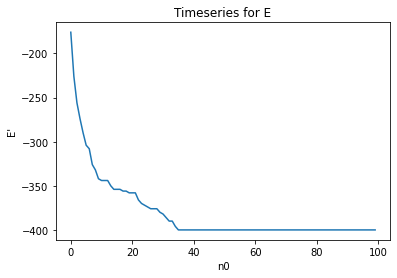

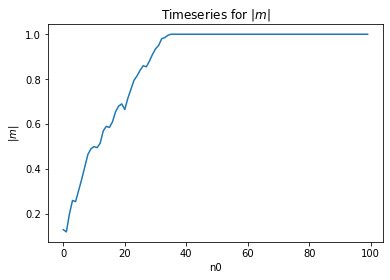

Actual Expectation of E = -400.0
Actual Expectation of |m| = 1.0


In [276]:
# defining a function to compute magnetization per site
def mag_per_site(M,L):
    N = L*L
    sum = 0
    for i in range(L):
        for j in range(L):
            sum += M[i][j]
    sum = abs(sum)
    m = sum/N
    return m

def convergence(M, L, N, T, n0):

    # defining arrays to store E and m
    E = np.zeros(n0)
    m = np.zeros(n0)

    #peforming the system update n0 times and recording E and m
    for i in range(n0):
        new_M = system_update(M, L, N, T)
        E[i] = energy_calc(new_M, L)
        m[i] = mag_per_site(new_M, L)
        M = np.copy(new_M)

    ts = np.arange(n0)

    # return timeseries, E, m
    return ts, E, m, M


# plotting a timeseries for n0 = 100
ts, E, m, upM = convergence(Mat, L, N, T, 100)
plt.plot(ts, E)
plt.xlabel("n0")
plt.ylabel("E'")
plt.title("Timeseries for E")
plt.show()
plt.plot(ts, m)
plt.xlabel("n0")
plt.ylabel("$|m|$")
plt.title("Timeseries for $|m|$")
plt.show()


"""
Now, we choose our value n_min = 40 since E amd m seem to have
stabilized for this value of n0 (n0 = 100)

Next, we compute the actual expectation values using the values of E and 
m after stabilization
"""
def expectation_calc(ts, E, m, nmin):
    newE = E[nmin:]
    newm = m[nmin:]
    expE = np.sum(newE)/len(newE)
    expm = np.sum(newm)/len(newm)
    return expE, expm

actualE, actualm = expectation_calc(ts, E, m, 40)
print(f'Actual Expectation of E = {actualE}')
print(f'Actual Expectation of |m| = {actualm}')


#### 7. By adjusting $T′$, analogously obtain numerical expectation values for E′ and $|m|$ at $T \in \{0.1, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0, 10.0\}$ and plot them as function of T′ by averaging the data obtained from samples for $n > n_{min} $. At this stage, note that the rate of convergence to equilibrium will depend on the value of T′, hence, again, $n_{min}$ may need to be adjusted. To visualize, for each T′ plot a 2D ”map” of the spin configuration for the final stage at $n_0$ (10 pts).

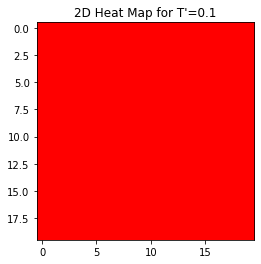

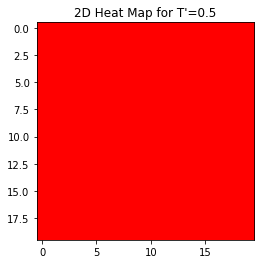

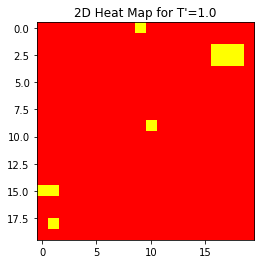

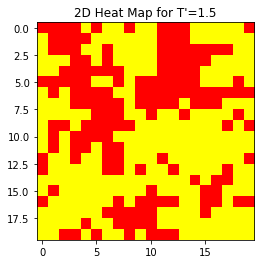

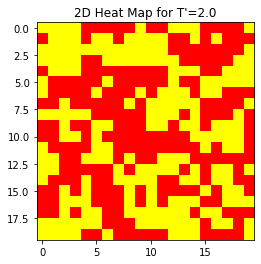

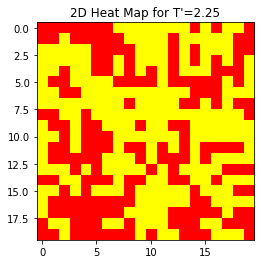

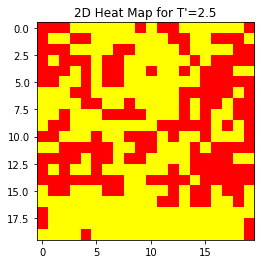

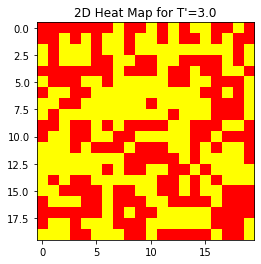

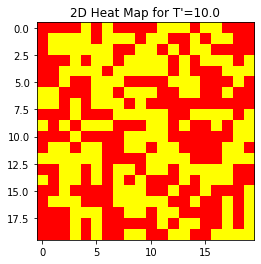

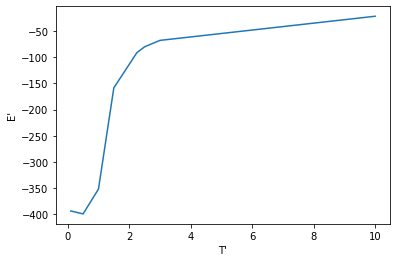

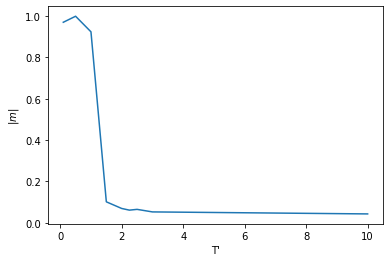

In [264]:
arrayT = np.array([0.1, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0, 10.0])
arrayE = np.zeros(9)
arraym = np.zeros(9)

ts1, E1, m1, upM1 = convergence(Mat, L, N, arrayT[0], 100)
arrayE[0], arraym[0] = expectation_calc(ts1, E1, m1, 40)
# plt.plot(ts1, E1)
# plt.show()
# plt.plot(ts1, m1)
# plt.show()
plt.imshow(upM1, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=0.1")
plt.show()


ts2, E2, m2, upM2 = convergence(Mat, L, N, arrayT[1], 150)
arrayE[1], arraym[1] = expectation_calc(ts2, E2, m2, 60)
# plt.plot(ts2, E2)
# plt.show()
# plt.plot(ts2, m2)
# plt.show()
plt.imshow(upM2, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=0.5")
plt.show()

ts3, E3, m3, upM3 = convergence(Mat, L, N, arrayT[2], 250)
arrayE[2], arraym[2] = expectation_calc(ts3, E3, m3, 200)
# plt.plot(ts3, E3)
# plt.show()
# plt.plot(ts3, m3)
# plt.show()
plt.imshow(upM3, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=1.0")
plt.show()

ts4, E4, m4, upM4 = convergence(Mat, L, N, arrayT[3], 700)
arrayE[3], arraym[3] = expectation_calc(ts4, E4, m4, 650)
# plt.plot(ts4, E4)
# plt.show()
# plt.plot(ts4, m4)
# plt.show()
plt.imshow(upM4, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=1.5")
plt.show()

ts5, E5, m5, upM5 = convergence(Mat, L, N, arrayT[4], 1400)
arrayE[4], arraym[4] = expectation_calc(ts5, E5, m5, 1350)
# plt.plot(ts5, E5)
# plt.show()
# plt.plot(ts5, m5)
# plt.show()
plt.imshow(upM5, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=2.0")
plt.show()

ts6, E6, m6, upM6 = convergence(Mat, L, N, arrayT[5], 1700)
arrayE[5], arraym[5] = expectation_calc(ts6, E6, m6, 1650)
# plt.plot(ts6, E6)
# plt.show()
# plt.plot(ts6, m6)
# plt.show()
plt.imshow(upM6, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=2.25")
plt.show()

ts7, E7, m7, upM7 = convergence(Mat, L, N, arrayT[6], 2000)
arrayE[6], arraym[6] = expectation_calc(ts7, E7, m7, 1950)
# plt.plot(ts7, E7)
# plt.show()
# plt.plot(ts7, m7)
# plt.show()
plt.imshow(upM7, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=2.5")
plt.show()

ts8, E8, m8, upM8 = convergence(Mat, L, N, arrayT[7], 3500)
arrayE[7], arraym[7] = expectation_calc(ts8, E8, m8, 3450)
# plt.plot(ts8, E8)
# plt.show()
# plt.plot(ts8, m8)
# plt.show()
plt.imshow(upM8, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=3.0")
plt.show()

ts9, E9, m9, upM9 = convergence(Mat, L, N, arrayT[8], 12000)
arrayE[8], arraym[8] = expectation_calc(ts9, E9, m9, 11950)
# plt.plot(ts9, E9)
# plt.show()
# plt.plot(ts9, m9)
# plt.show()
plt.imshow(upM9, cmap = 'autumn',interpolation = 'nearest')
plt.title("2D Heat Map for T'=10.0")
plt.show()


plt.plot(arrayT, arrayE)
plt.xlabel("T'")
plt.ylabel("E'")
plt.show()
plt.plot(arrayT, arraym)
plt.xlabel("T'")
plt.ylabel("$|m|$")
plt.show()

** The above simulation took close to 16 hours to run.

#### 8. For the 2D Ising Model an exact result exists, where $<m>^8 = 1 - [sinh(2/T')]^{-4}$ for 0 < T' < $T'_c$, for $T'_c = 2 / ln(1 + \sqrt{2})$ and $<m> = 0$ for $T' > T'_c$ (Onsager's Solution). Discuss how far your numerical results agree with this solution (10 pts).


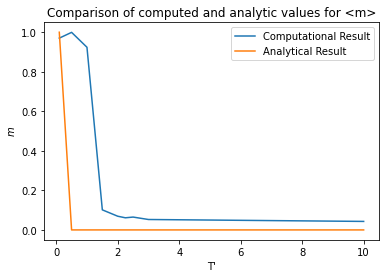

In [278]:
def exact_solution(T):
    m = (1-(np.sinh(2/T))**-4)**(1/8)
    return m

# computing analytic m values accordingly
analytic_m = np.zeros(9)
for i in range(2):
    analytic_m[0] = exact_solution(arrayT[i])

# plotting to compare
plt.plot(arrayT, arraym, label = 'Computational Result')
plt.plot(arrayT, analytic_m, label = 'Analytical Result')
plt.legend()
plt.xlabel("T'")
plt.ylabel("$m$")
plt.title("Comparison of computed and analytic values for <m>")
plt.show()


As can be seen, although the computational result is slightly different, this is probably due to the limited iterations we could accomplish (even with these limited computations, it took me 16 hours). Therefore, since the trend lines are generally the same with a slight error, the numerical values agree with the analytic solutions upto some extent.

#### 9. (10 pts extra credit). Using different random number seeds, repeat the simulation several times for each observable and temperature to obtain a distribution of results for that data point. Use the distribution to quantify the sampling error and plot the error bars.

Not attempted since it would take too much time.

#### 10. (10 pts extra credit). Repeat for a larger system size L and make notes of your findings for $n_{min}$ and discuss (qualitatively) how $n_{min}$ and the error bars depend on system size.

Not attempted due to time constraints